In [196]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [197]:
df= pd.read_csv(r'https://raw.githubusercontent.com/Keshavpawar137/Data-Science-Assignment/main/MLR/ToyotaCorolla%20-%20MLR.csv')

In [198]:
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

In [199]:
df.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

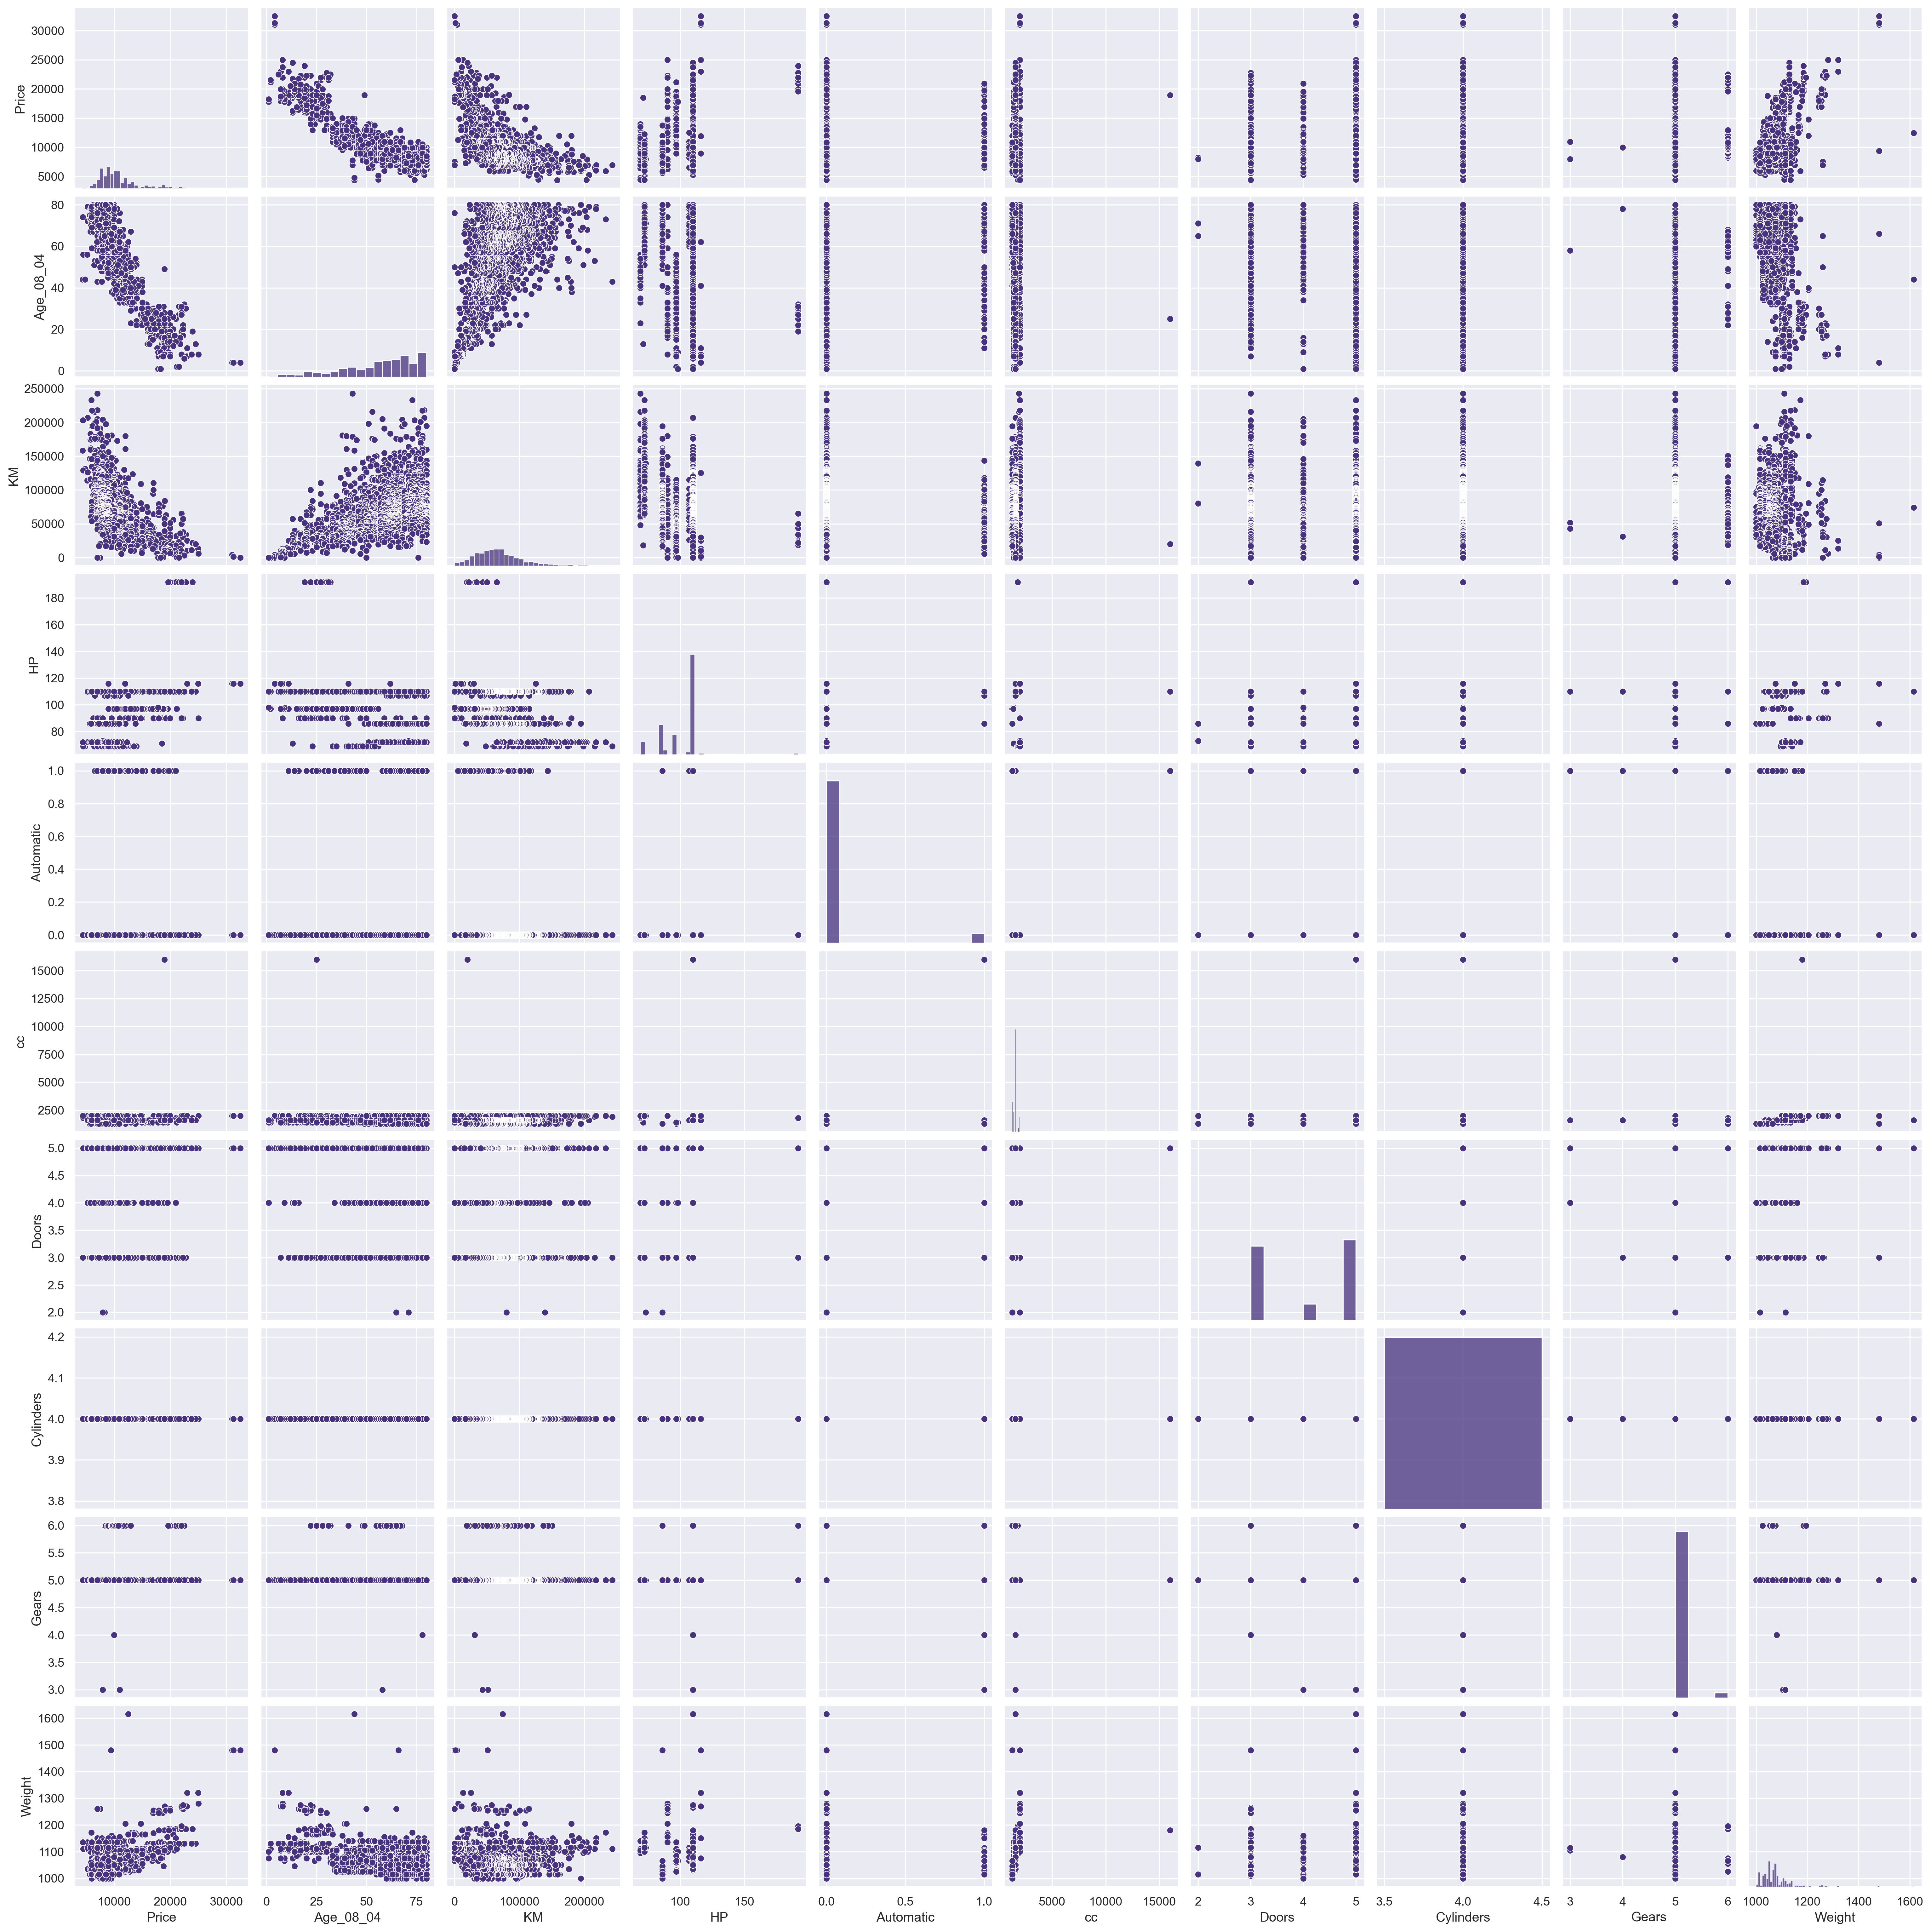

In [200]:
sns.pairplot(df)

# Model Building 

In [201]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [202]:
import statsmodels.formula.api as smf
model= smf.ols('Price~ Age_08_04+KM+Fuel_Type+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=df).fit()


In [203]:
model.params

Intercept              -580.060541
Fuel_Type[T.Diesel]     554.054345
Fuel_Type[T.Petrol]    1144.096645
Age_08_04              -123.777069
KM                       -0.017523
HP                       23.526963
Automatic               300.259212
cc                       -0.055629
Doors                   -30.356710
Cylinders             -2320.242164
Gears                   622.798964
Weight                   20.817390
dtype: float64

In [204]:
model.pvalues

Intercept               1.553540e-10
Fuel_Type[T.Diesel]     1.479298e-01
Fuel_Type[T.Petrol]     7.487350e-04
Age_08_04              2.563202e-292
KM                      2.205339e-37
HP                      6.531756e-11
Automatic               6.243429e-02
cc                      5.457514e-01
Doors                   4.581674e-01
Cylinders               1.553540e-10
Gears                   1.694943e-03
Weight                  1.041115e-59
dtype: float64

We check which colums are most important in this dataset to  get most accurate prediction 

In [205]:
# Setting the significance level
alpha = 0.05

# Iterating over p-values to check hypothesis
for column, p_value in model.pvalues.items():
    if p_value < alpha:
        print(f"For '{column}': Reject Null Hypothesis (p-value = {p_value:.4f})")
    else:
        print(f"For '{column}': Fail to Reject Null Hypothesis (p-value = {p_value:.4f})")


For 'Intercept': Reject Null Hypothesis (p-value = 0.0000)
For 'Fuel_Type[T.Diesel]': Fail to Reject Null Hypothesis (p-value = 0.1479)
For 'Fuel_Type[T.Petrol]': Reject Null Hypothesis (p-value = 0.0007)
For 'Age_08_04': Reject Null Hypothesis (p-value = 0.0000)
For 'KM': Reject Null Hypothesis (p-value = 0.0000)
For 'HP': Reject Null Hypothesis (p-value = 0.0000)
For 'Automatic': Fail to Reject Null Hypothesis (p-value = 0.0624)
For 'cc': Fail to Reject Null Hypothesis (p-value = 0.5458)
For 'Doors': Fail to Reject Null Hypothesis (p-value = 0.4582)
For 'Cylinders': Reject Null Hypothesis (p-value = 0.0000)
For 'Gears': Reject Null Hypothesis (p-value = 0.0017)
For 'Weight': Reject Null Hypothesis (p-value = 0.0000)


# Calculate VIF  (variance inflation Factor)

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [207]:
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [208]:
data = df.drop(columns=['Price'])


# List comprehension

In [209]:
lst_com = [i*2 for i in range(1,11)]
lst_com

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [210]:
data.columns

Index(['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [211]:
vif= pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [212]:
vif['Features'] = data.columns


In [213]:
len(data.columns)

10

In [214]:
range(len(data.columns))

range(0, 10)

In [215]:
print(data.dtypes)

Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


In [216]:
data = df.drop(columns=['Price'])


In [217]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Diesel': 0, 'Petrol': 1, 'CNG': 2})

data

Age_08_04     KM  Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
0            23  46986          0   90          0  2000      3          4   
1            23  72937          0   90          0  2000      3          4   
2            24  41711          0   90          0  2000      3          4   
3            26  48000          0   90          0  2000      3          4   
4            30  38500          0   90          0  2000      3          4   
...         ...    ...        ...  ...        ...   ...    ...        ...   
1431         69  20544          1   86          0  1300      3          4   
1432         72  19000          1   86          0  1300      3          4   
1433         71  17016          1   86          0  1300      3          4   
1434         70  16916          1   86          0  1300      3          4   
1435         76      1          1  110          0  1600      5          4   

      Gears  Weight  
0         5    1165  
1         5    1165  
2         5    1165  
3         5    1165  
4         5    1170  
...     ...     ...  
1431      5    1025  
1432      5    1015  
1433      5    1015  
1434      5    1015  
1435      5    1114  

[1436 rows x 10 columns]

In [218]:
[variance_inflation_factor(data,i)for i in range(0,10)]

[1.9120964926348352,
 1.7269140624836739,
 2.845755154003724,
 1.9974195758375455,
 1.0780940523559384,
 1.203721693621555,
 1.1846835995618896,
 1797.2494158744453,
 1.1133531162894408,
 2.581105325634059]

In [219]:
vif['VIF']= [variance_inflation_factor(data.values,i)for i in  range(0,10)]
vif


Features          VIF
0  Age_08_04     1.912096
1         KM     1.726914
2  Fuel_Type     2.845755
3         HP     1.997420
4  Automatic     1.078094
5         cc     1.203722
6      Doors     1.184684
7  Cylinders  1797.249416
8      Gears     1.113353
9     Weight     2.581105

# Suset selection 

In [220]:
#in this we check fueal type model accurecy is best or not
cylinder=smf.ols('Price~ Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=df).fit()
cylinder.rsquared

0.8634360809289678

In [221]:
Fuel_type= smf.ols('Price~ Age_08_04+KM+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight',data=df).fit()
Fuel_type.rsquared

0.8649083778053924

In [222]:
Fuel_type.pvalues

Intercept               1.553540e-10
Fuel_Type[T.Diesel]     1.479298e-01
Fuel_Type[T.Petrol]     7.487350e-04
Age_08_04              2.563202e-292
KM                      2.205339e-37
HP                      6.531756e-11
Automatic               6.243429e-02
cc                      5.457514e-01
Doors                   4.581674e-01
Gears                   1.694943e-03
Weight                  1.041115e-59
dtype: float64

In [223]:
import statsmodels.api as sm

In [224]:
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

In [225]:
Fuel_type.fittedvalues

0       16304.152422
1       15849.403232
2       16272.811172
3       15915.052508
4       15690.503276
            ...     
1431     8694.200430
1432     8141.751414
1433     8300.294866
1434     8425.824273
1435    10527.736468
Length: 1436, dtype: float64

In [226]:
model.params

Intercept              -580.060541
Fuel_Type[T.Diesel]     554.054345
Fuel_Type[T.Petrol]    1144.096645
Age_08_04              -123.777069
KM                       -0.017523
HP                       23.526963
Automatic               300.259212
cc                       -0.055629
Doors                   -30.356710
Cylinders             -2320.242164
Gears                   622.798964
Weight                   20.817390
dtype: float64

In [227]:
model.resid

0      -2804.152422
1      -2099.403232
2      -2322.811172
3       -965.052508
4      -1940.503276
           ...     
1431   -1194.200430
1432    2703.248586
1433     199.705134
1434   -1175.824273
1435   -3577.736468
Length: 1436, dtype: float64

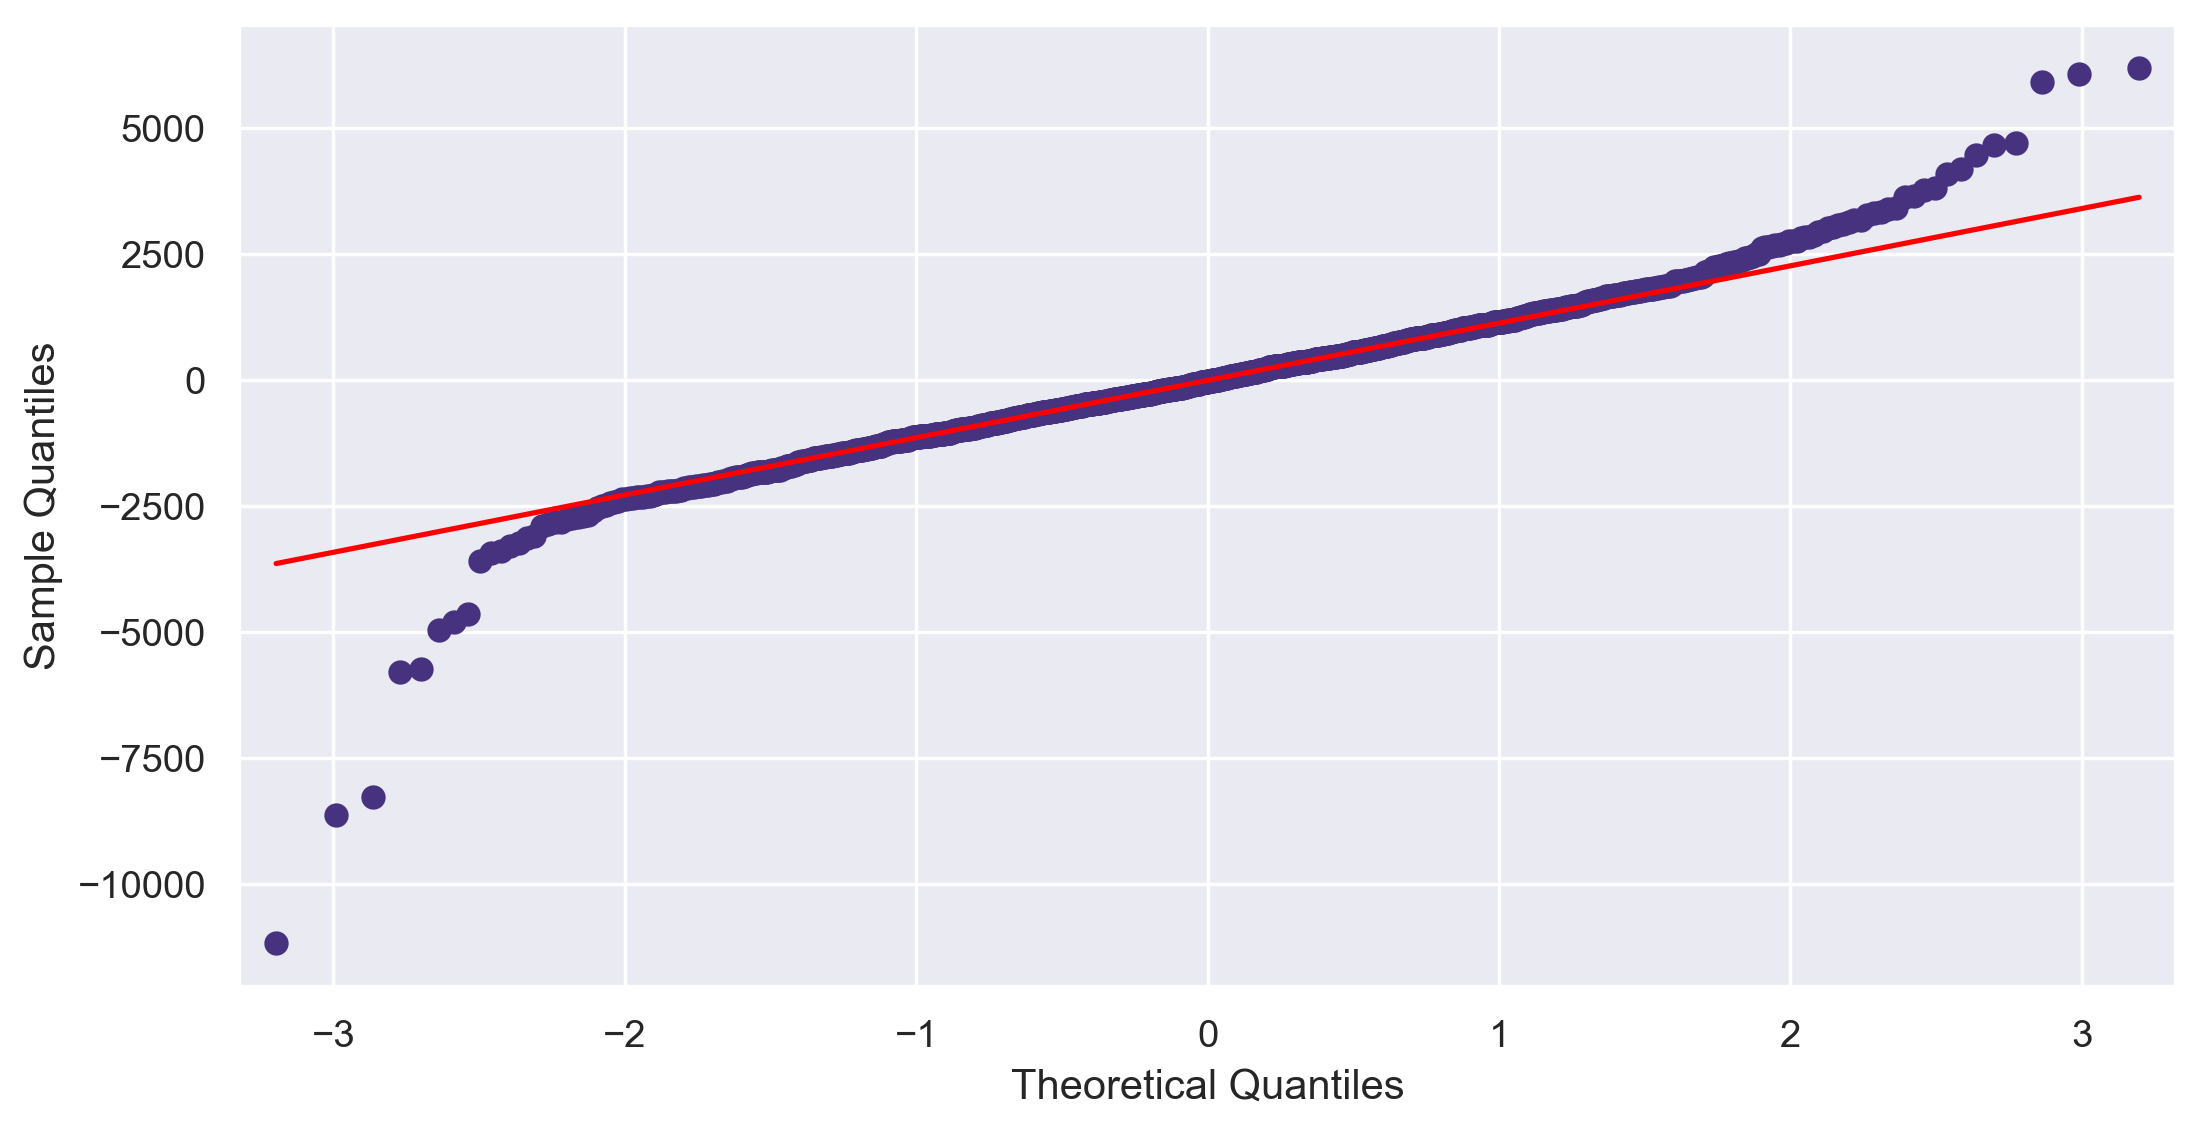

In [228]:
#Q-Q plot
sm.qqplot(model.resid,line ='q');

In [229]:
#get index for highest residuals
np.argmax(model.resid),np.max(model.resid)

(147, 6191.469675929402)

# Residual plot of Homoscedasticity

.Homoscedasticity can be checked by plotting a scatter plot between fitted value and residual.

In [230]:
model.resid

0      -2804.152422
1      -2099.403232
2      -2322.811172
3       -965.052508
4      -1940.503276
           ...     
1431   -1194.200430
1432    2703.248586
1433     199.705134
1434   -1175.824273
1435   -3577.736468
Length: 1436, dtype: float64

In [231]:
sns.set_theme(style ='darkgrid',palette='viridis')
#rainbow ,

Text(0.5, 1.0, 'Constant Variance')

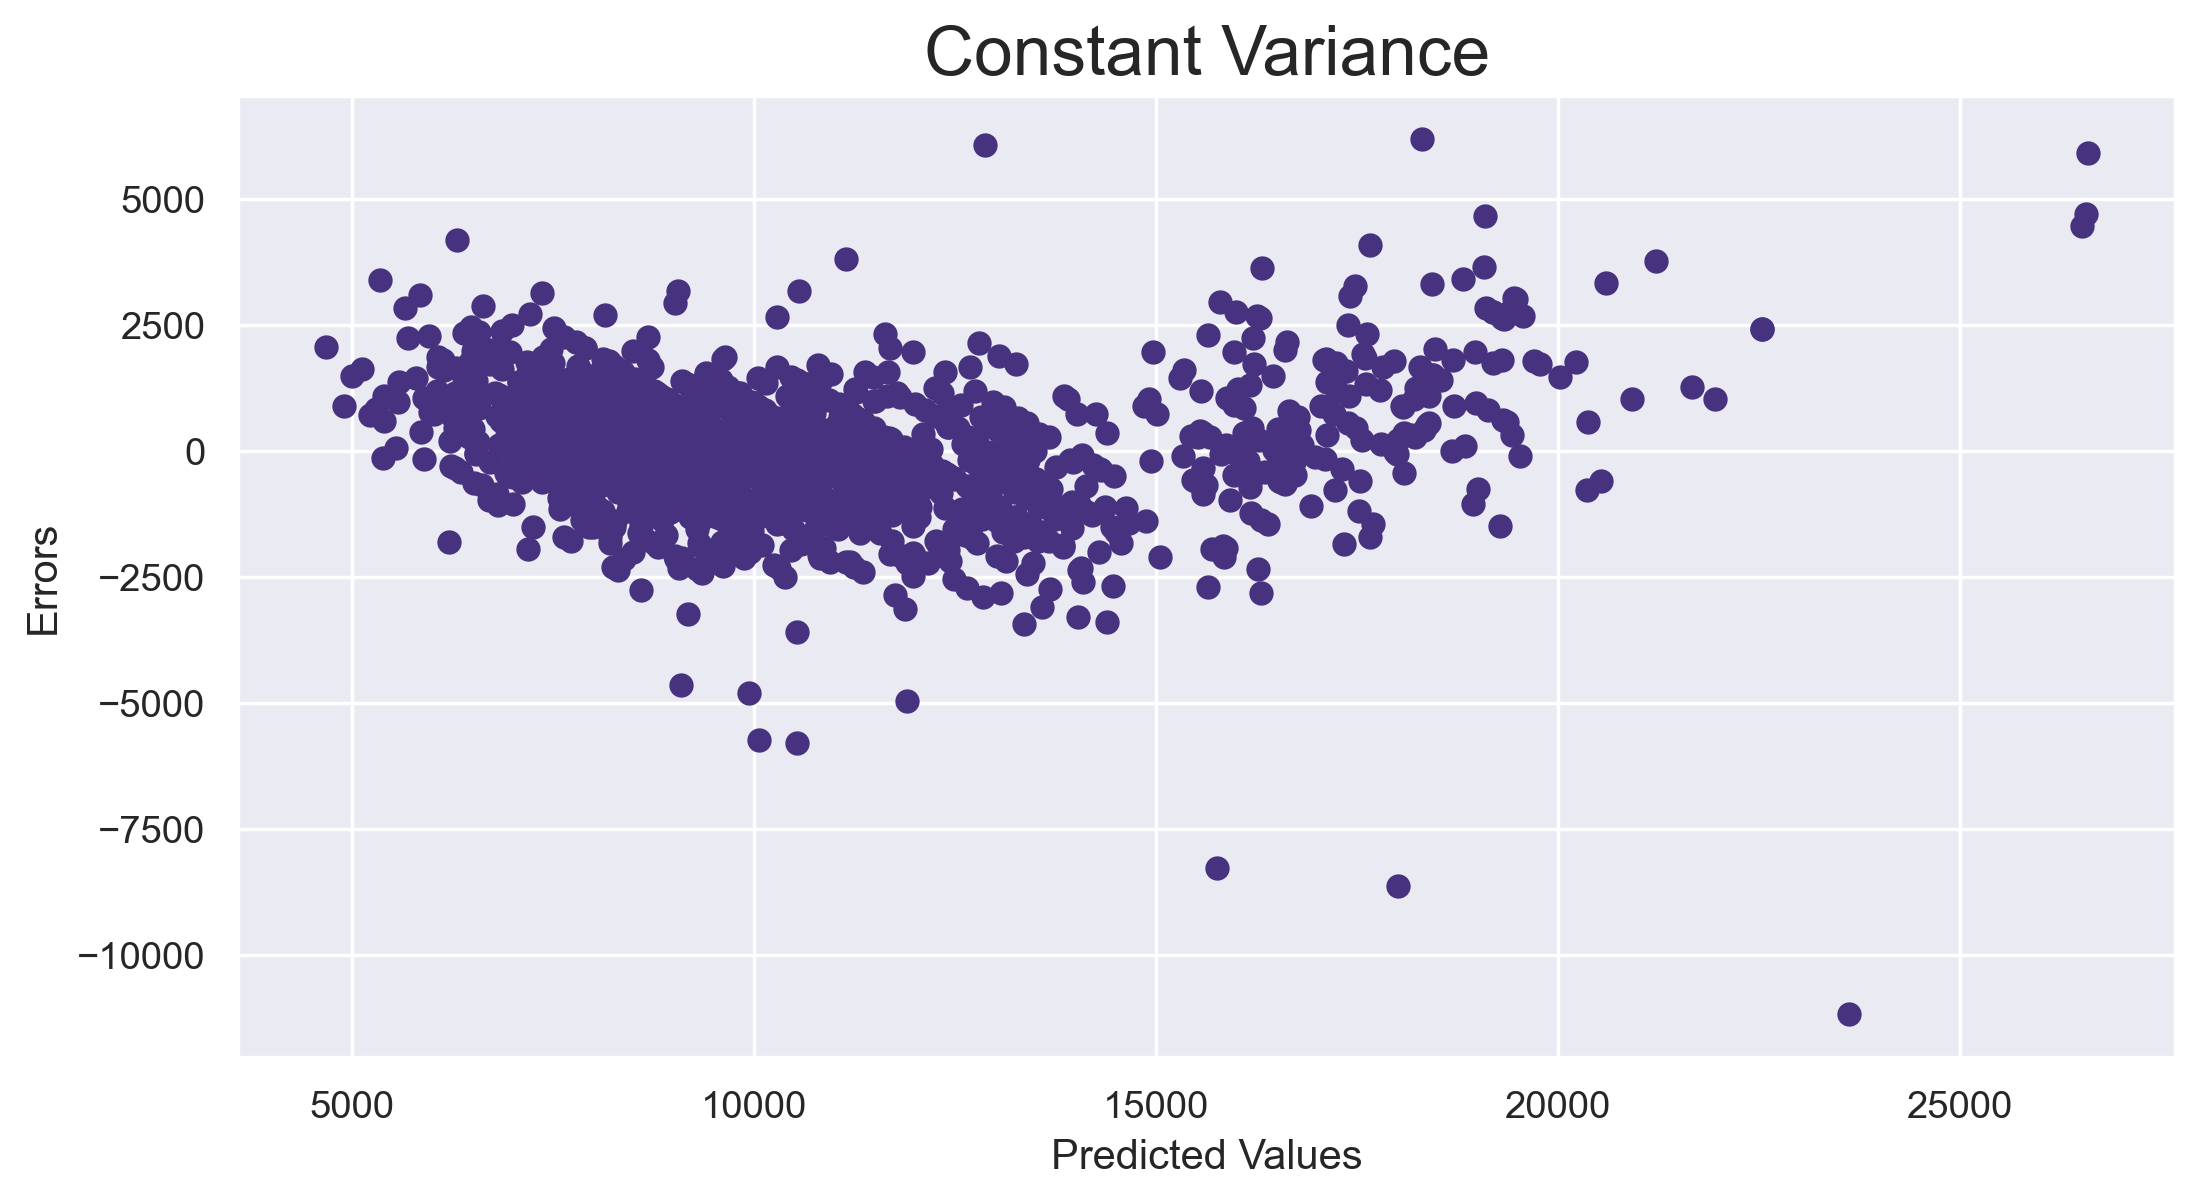

In [232]:
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.title('Constant Variance',size=20)
# pattern is there

In [233]:
model.params

Intercept              -580.060541
Fuel_Type[T.Diesel]     554.054345
Fuel_Type[T.Petrol]    1144.096645
Age_08_04              -123.777069
KM                       -0.017523
HP                       23.526963
Automatic               300.259212
cc                       -0.055629
Doors                   -30.356710
Cylinders             -2320.242164
Gears                   622.798964
Weight                   20.817390
dtype: float64

# 3. Resudiual Vs.Regressor (X)

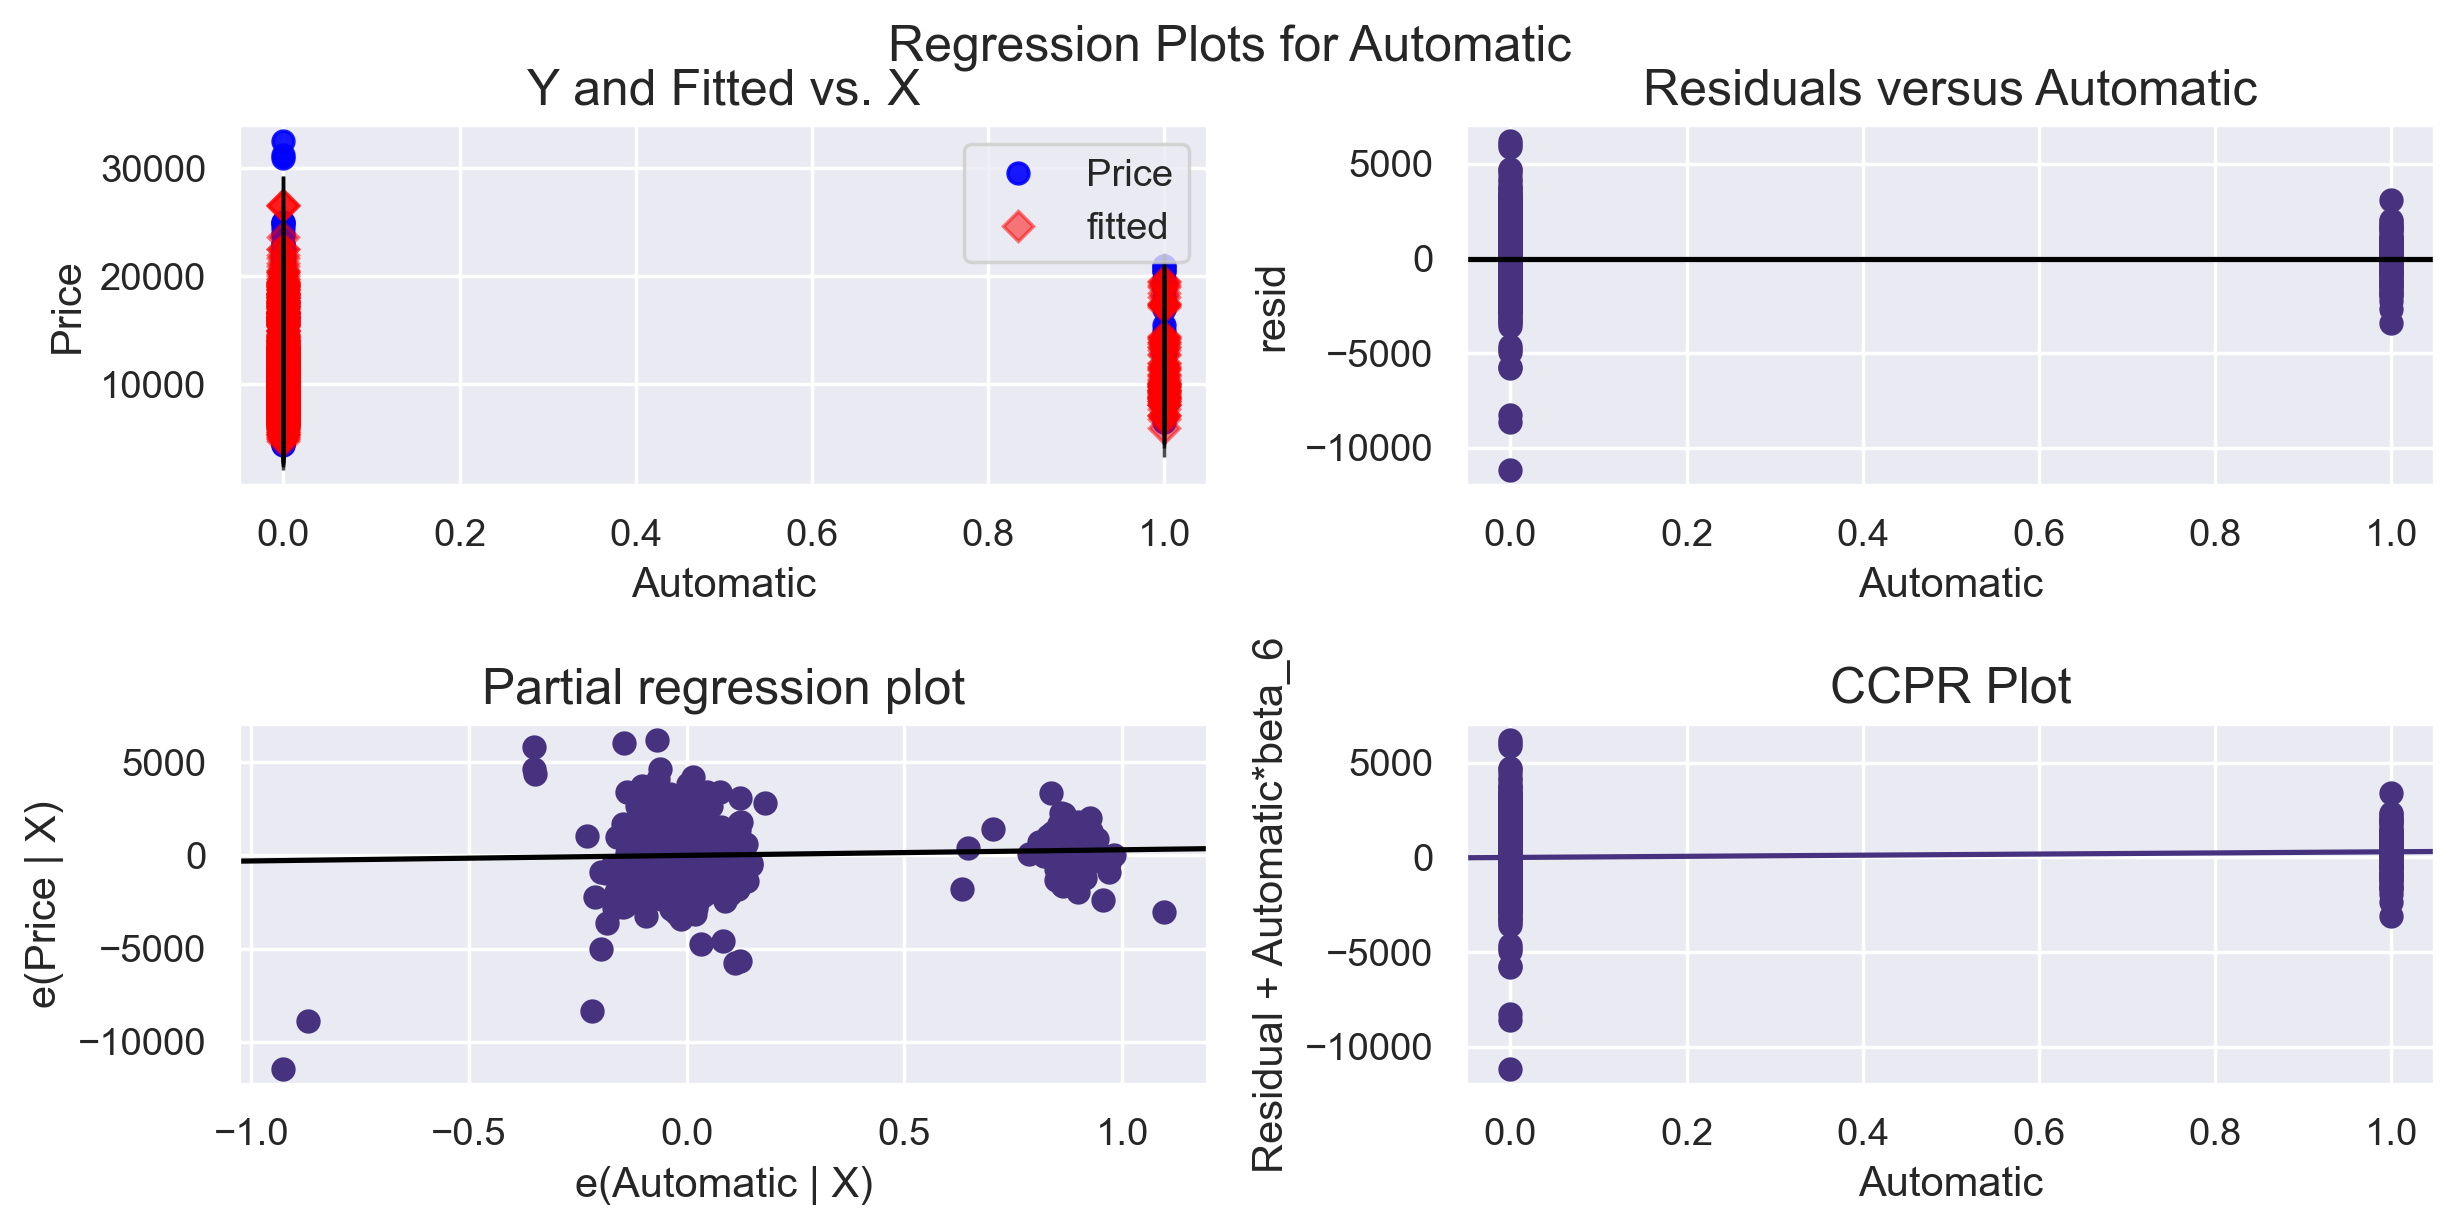

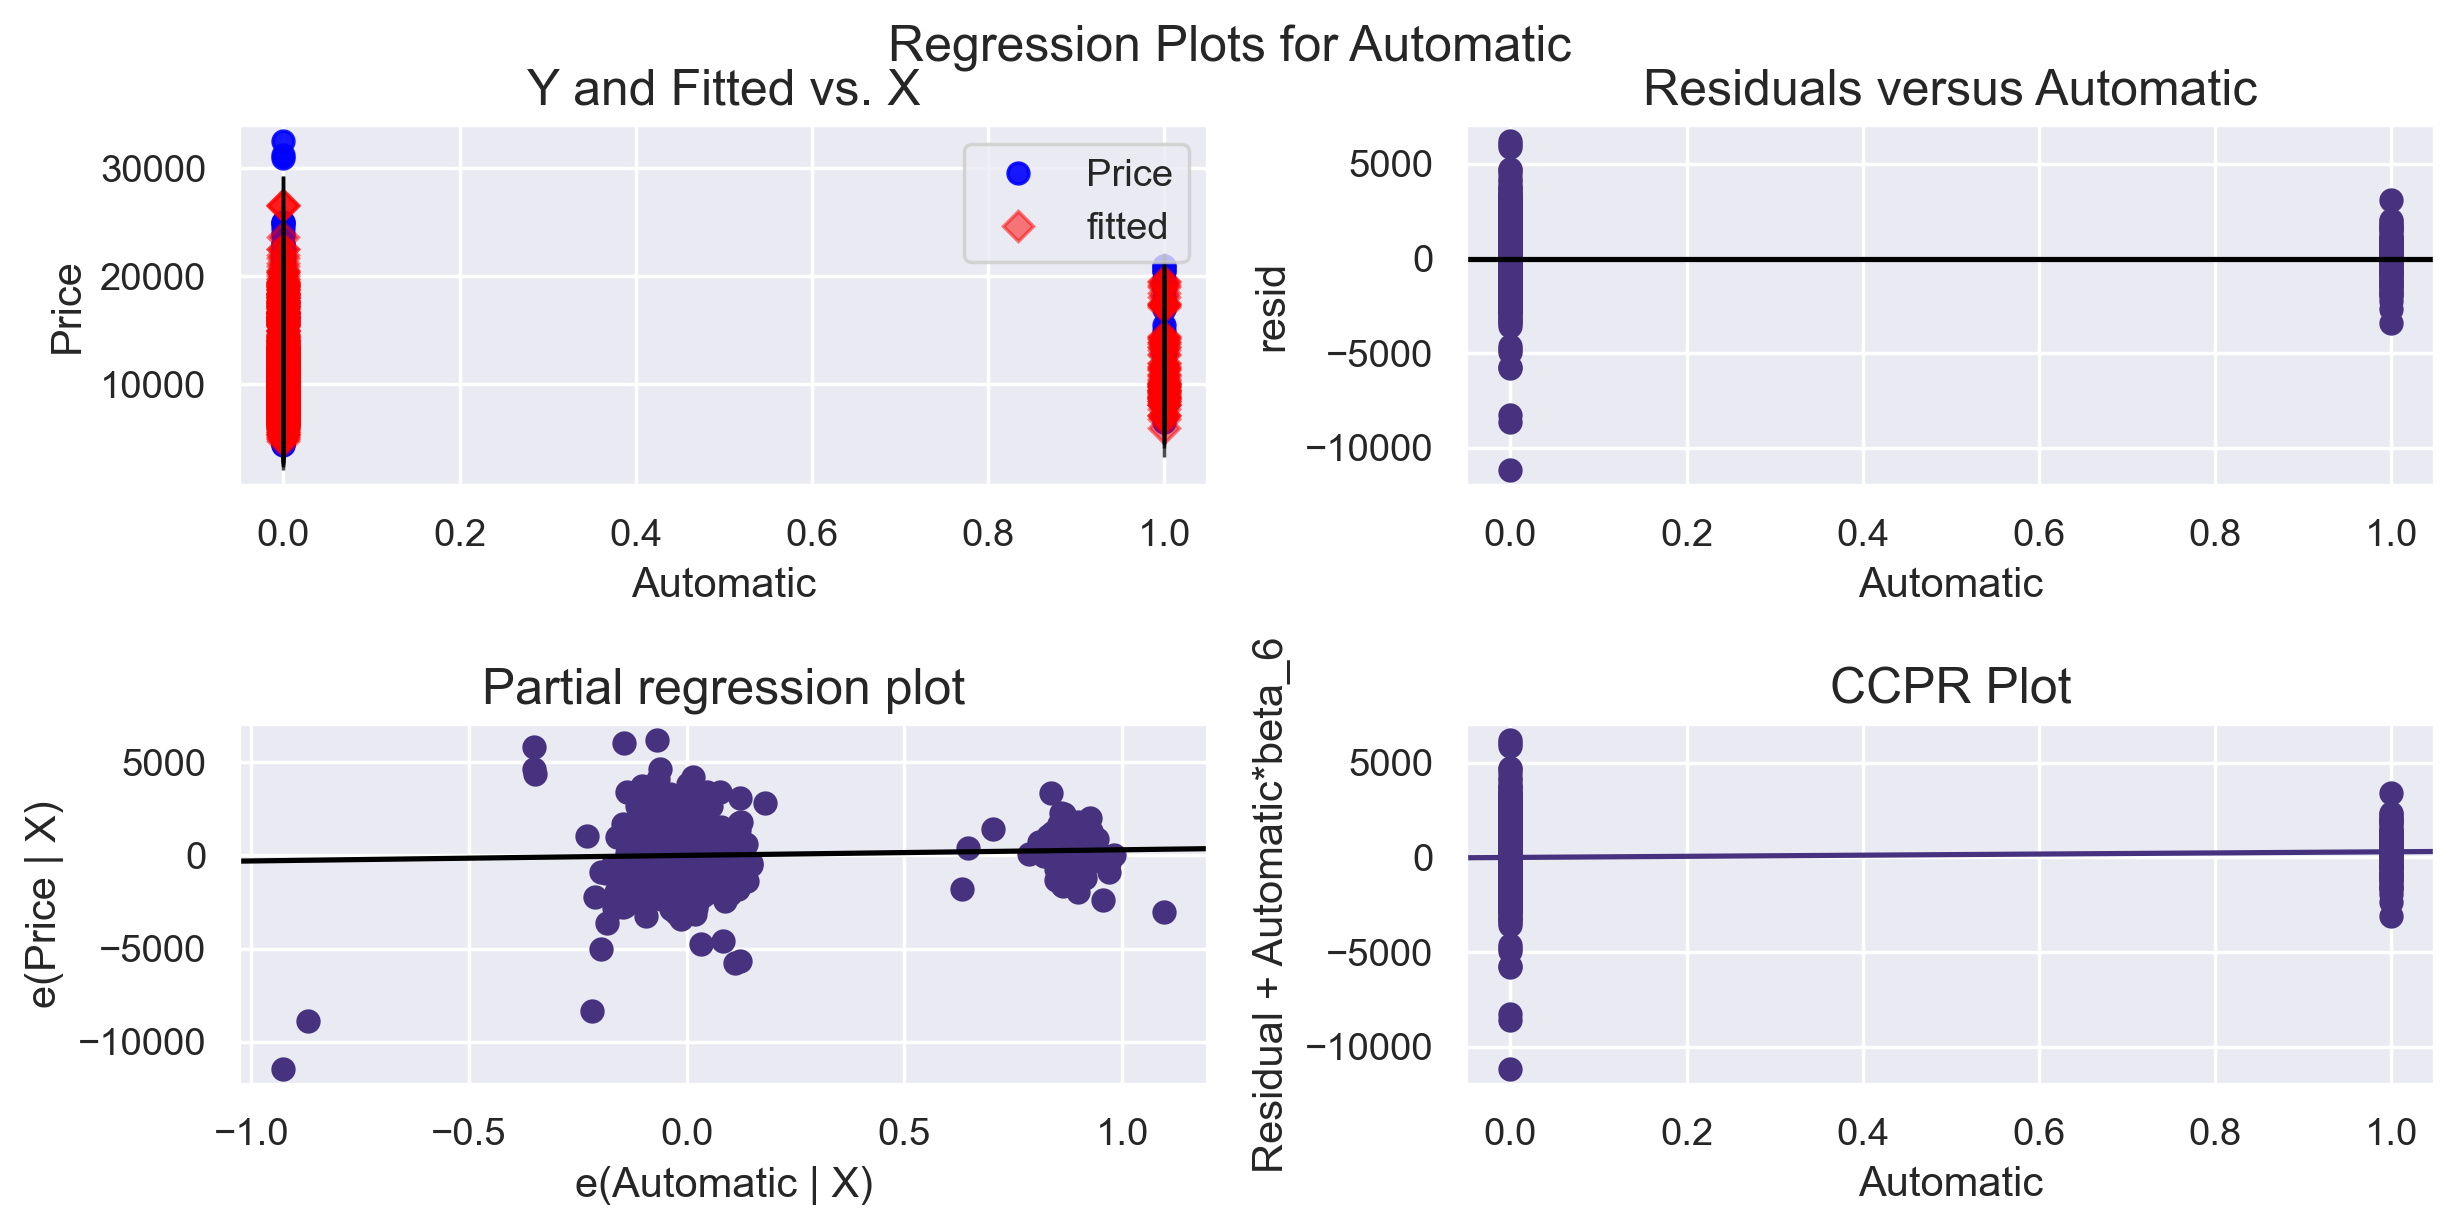

In [234]:
# 
sm.graphics.plot_regress_exog(model,'Automatic')


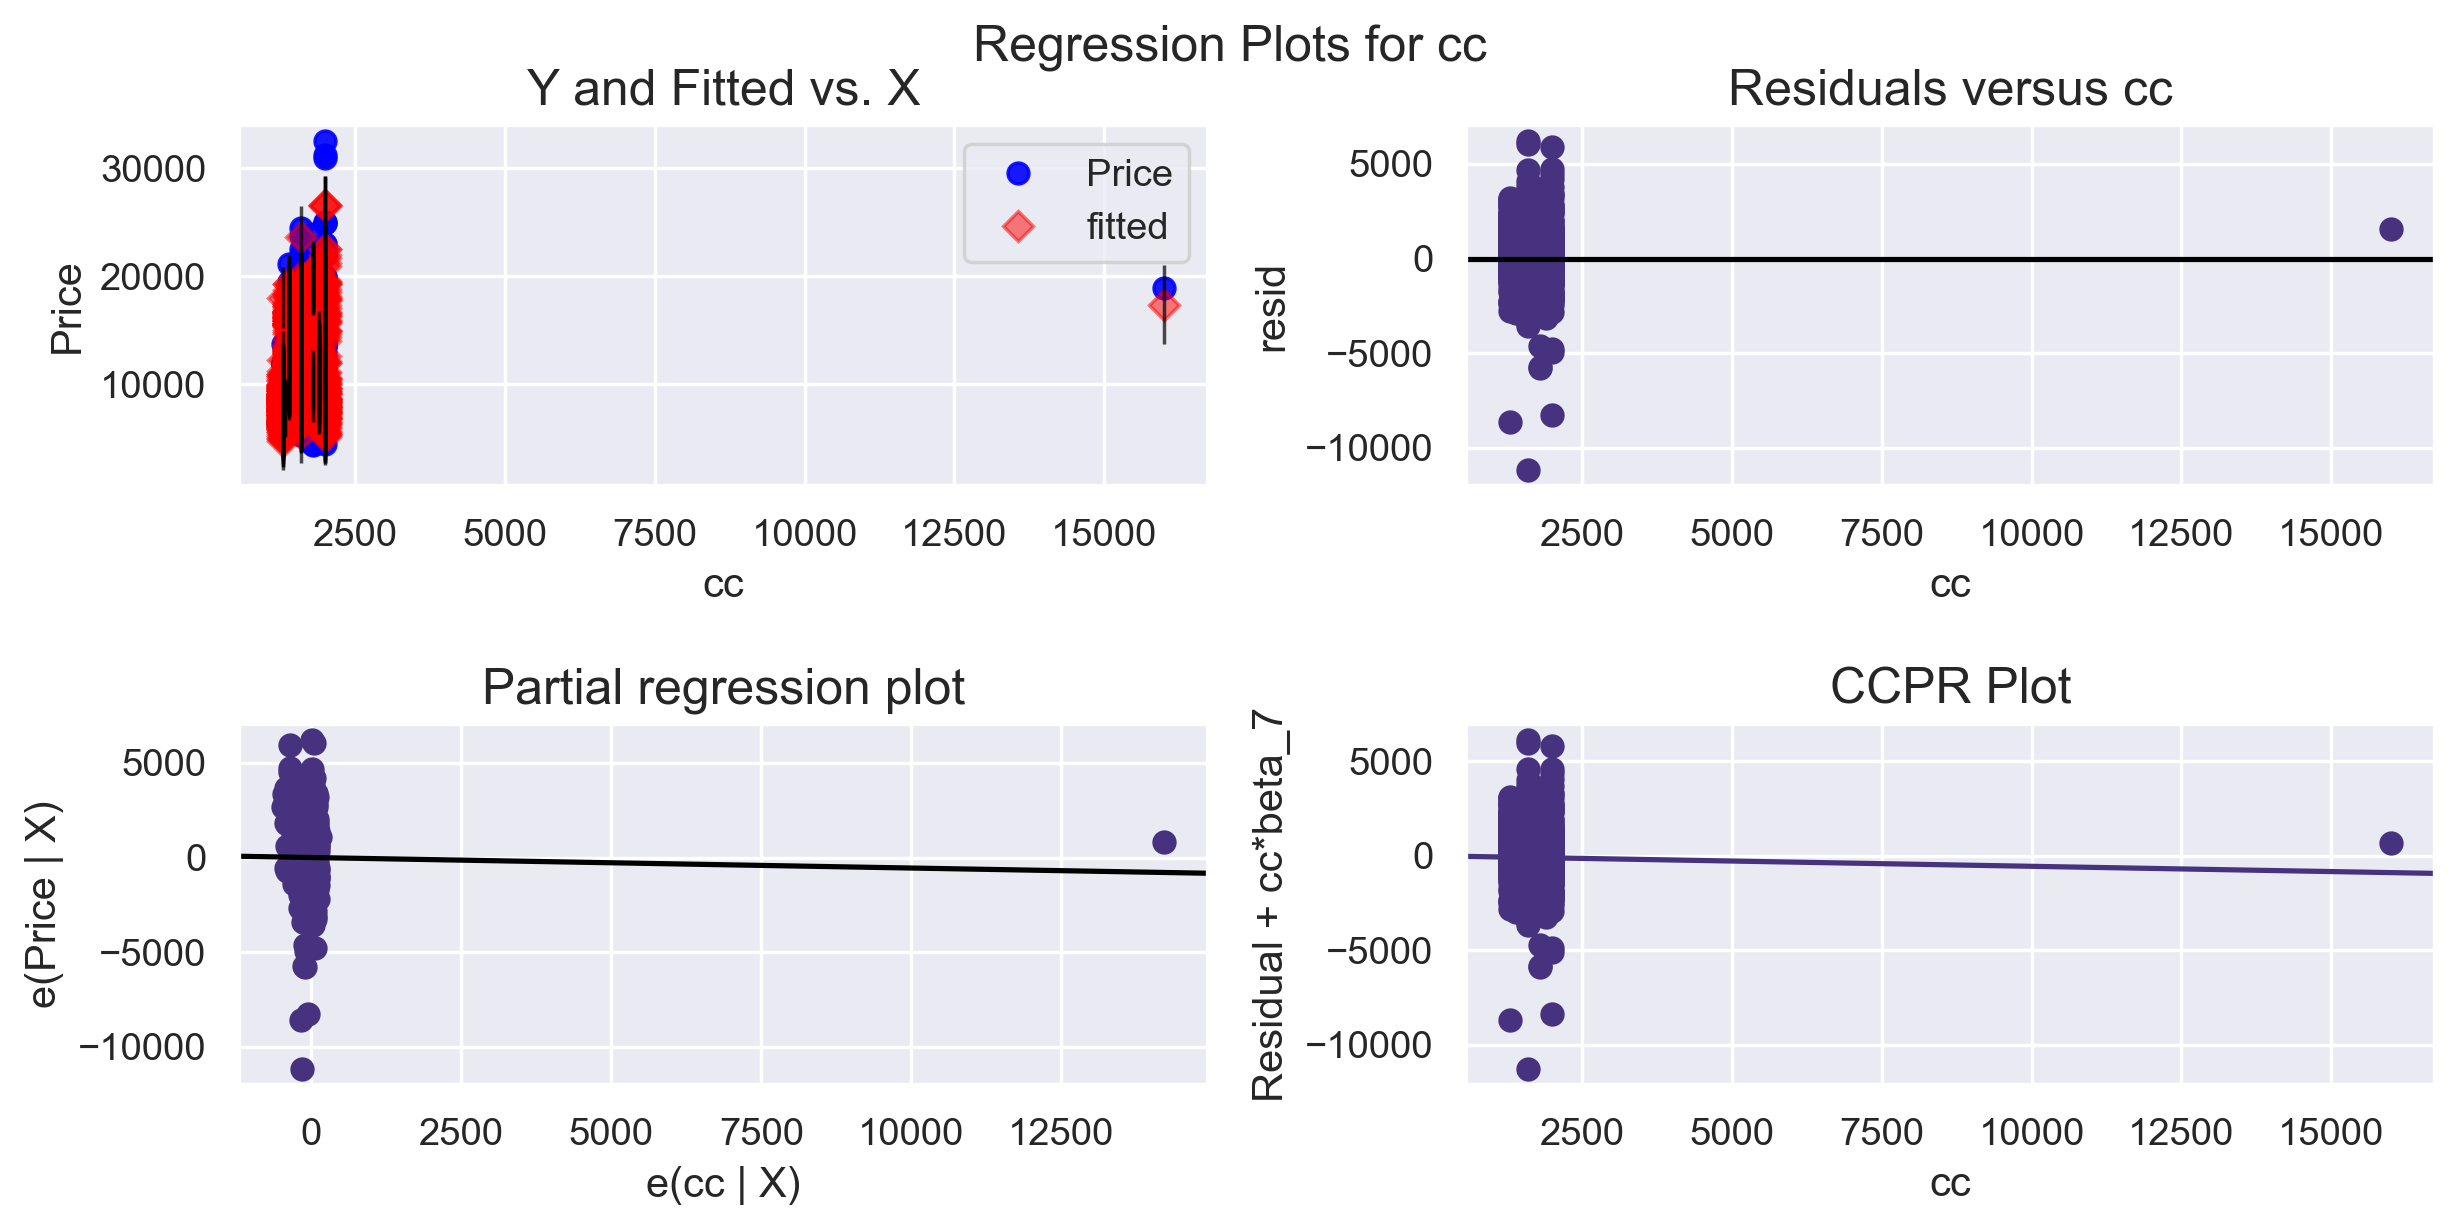

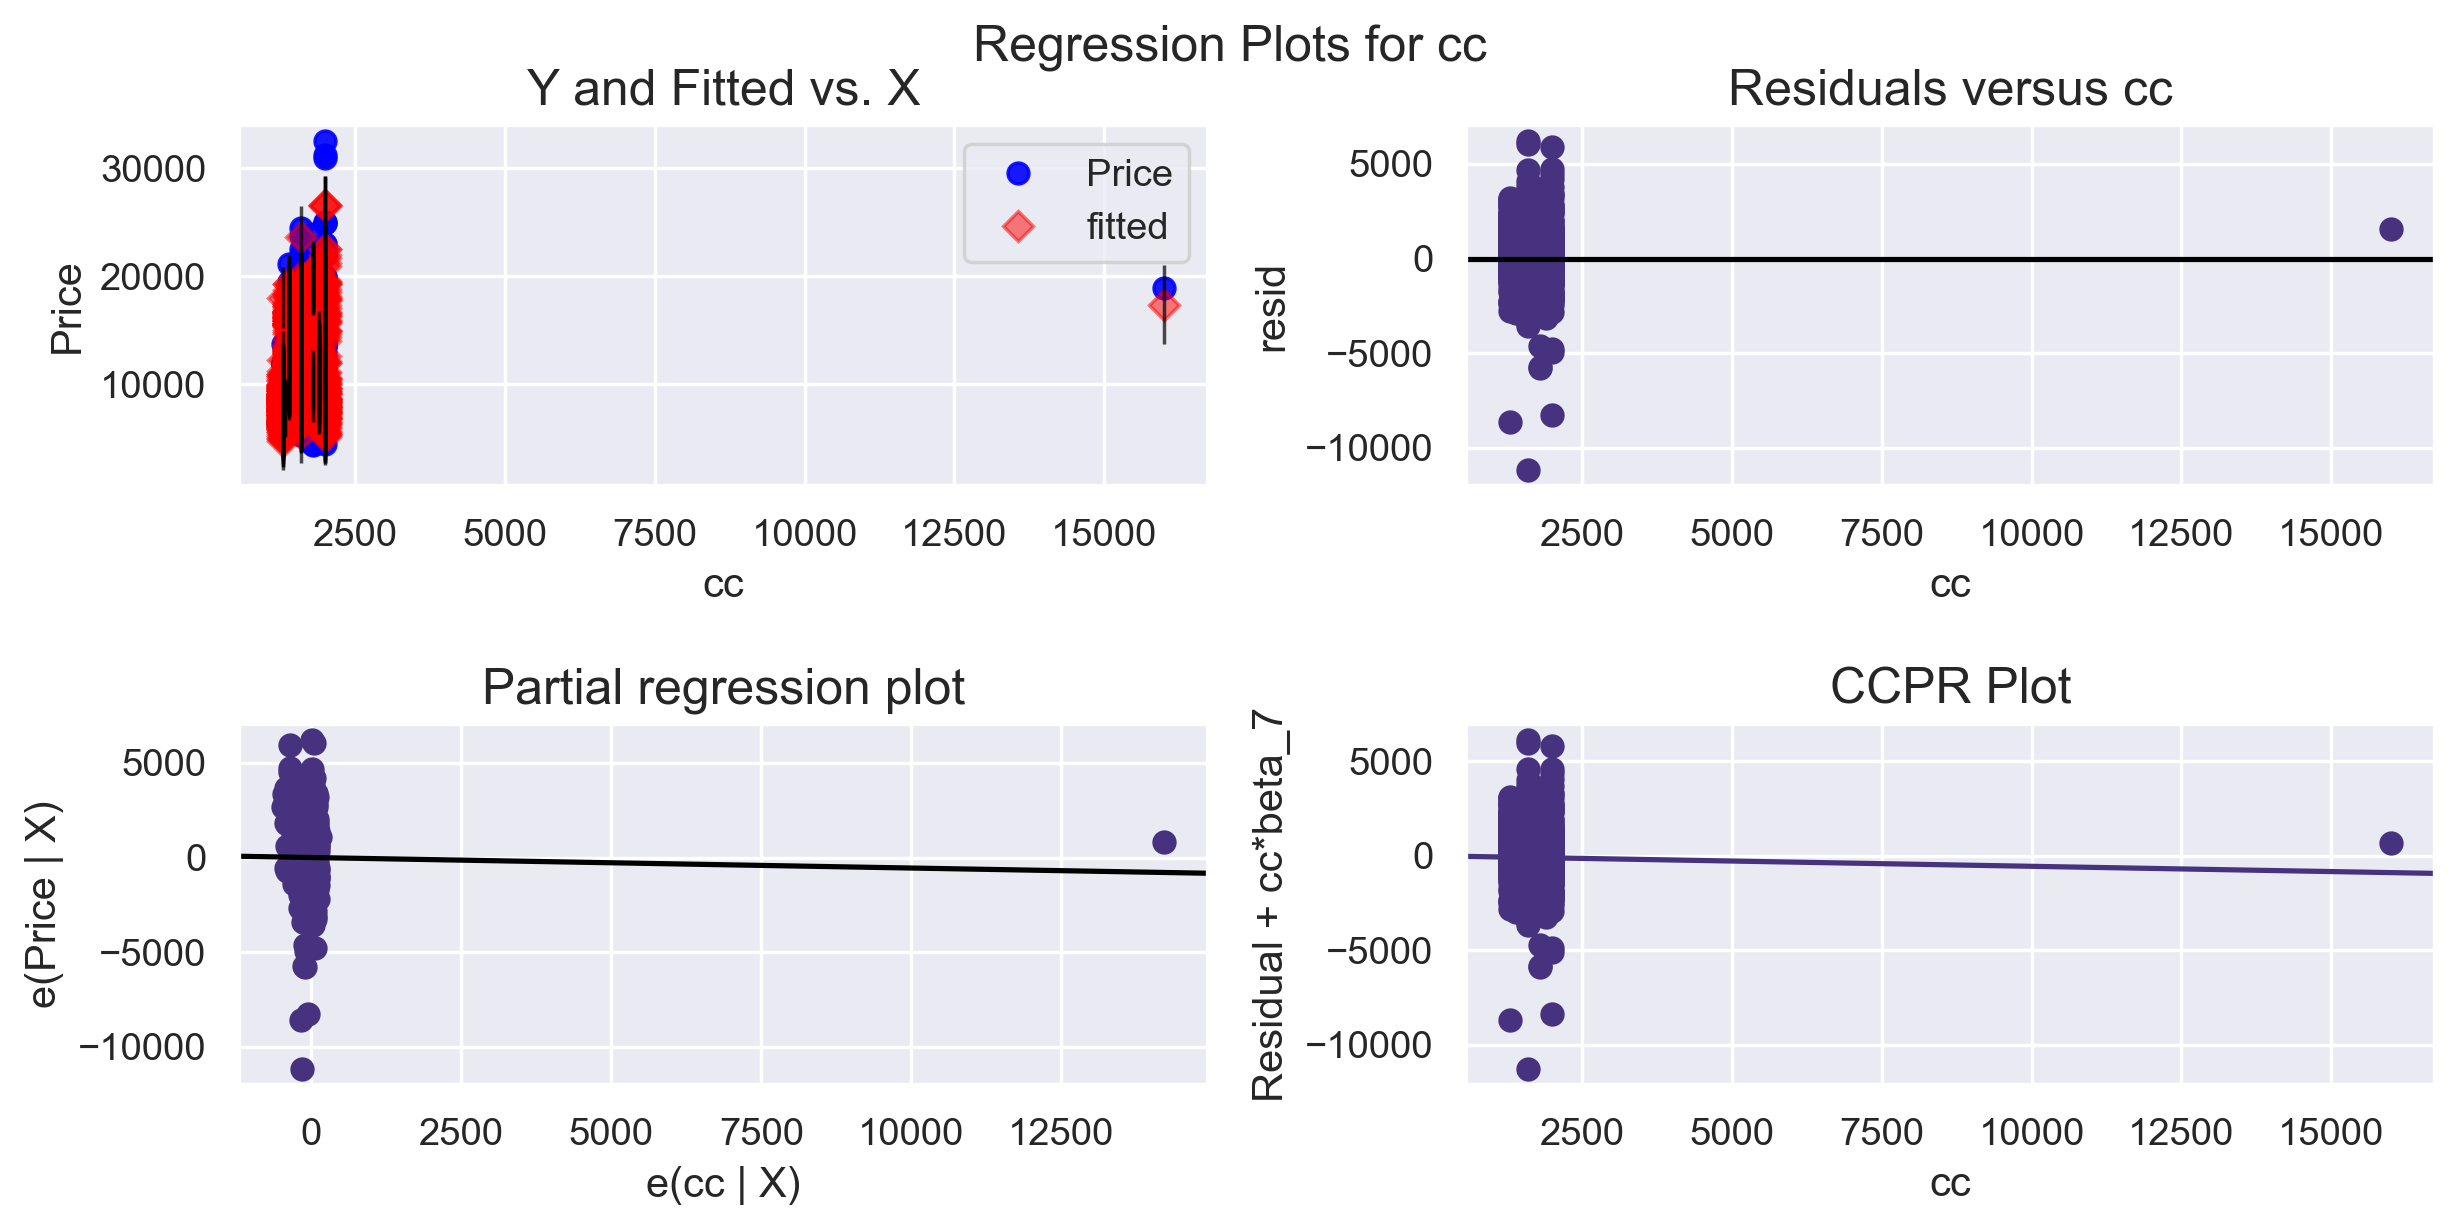

In [235]:

sm.graphics.plot_regress_exog(model,'cc')

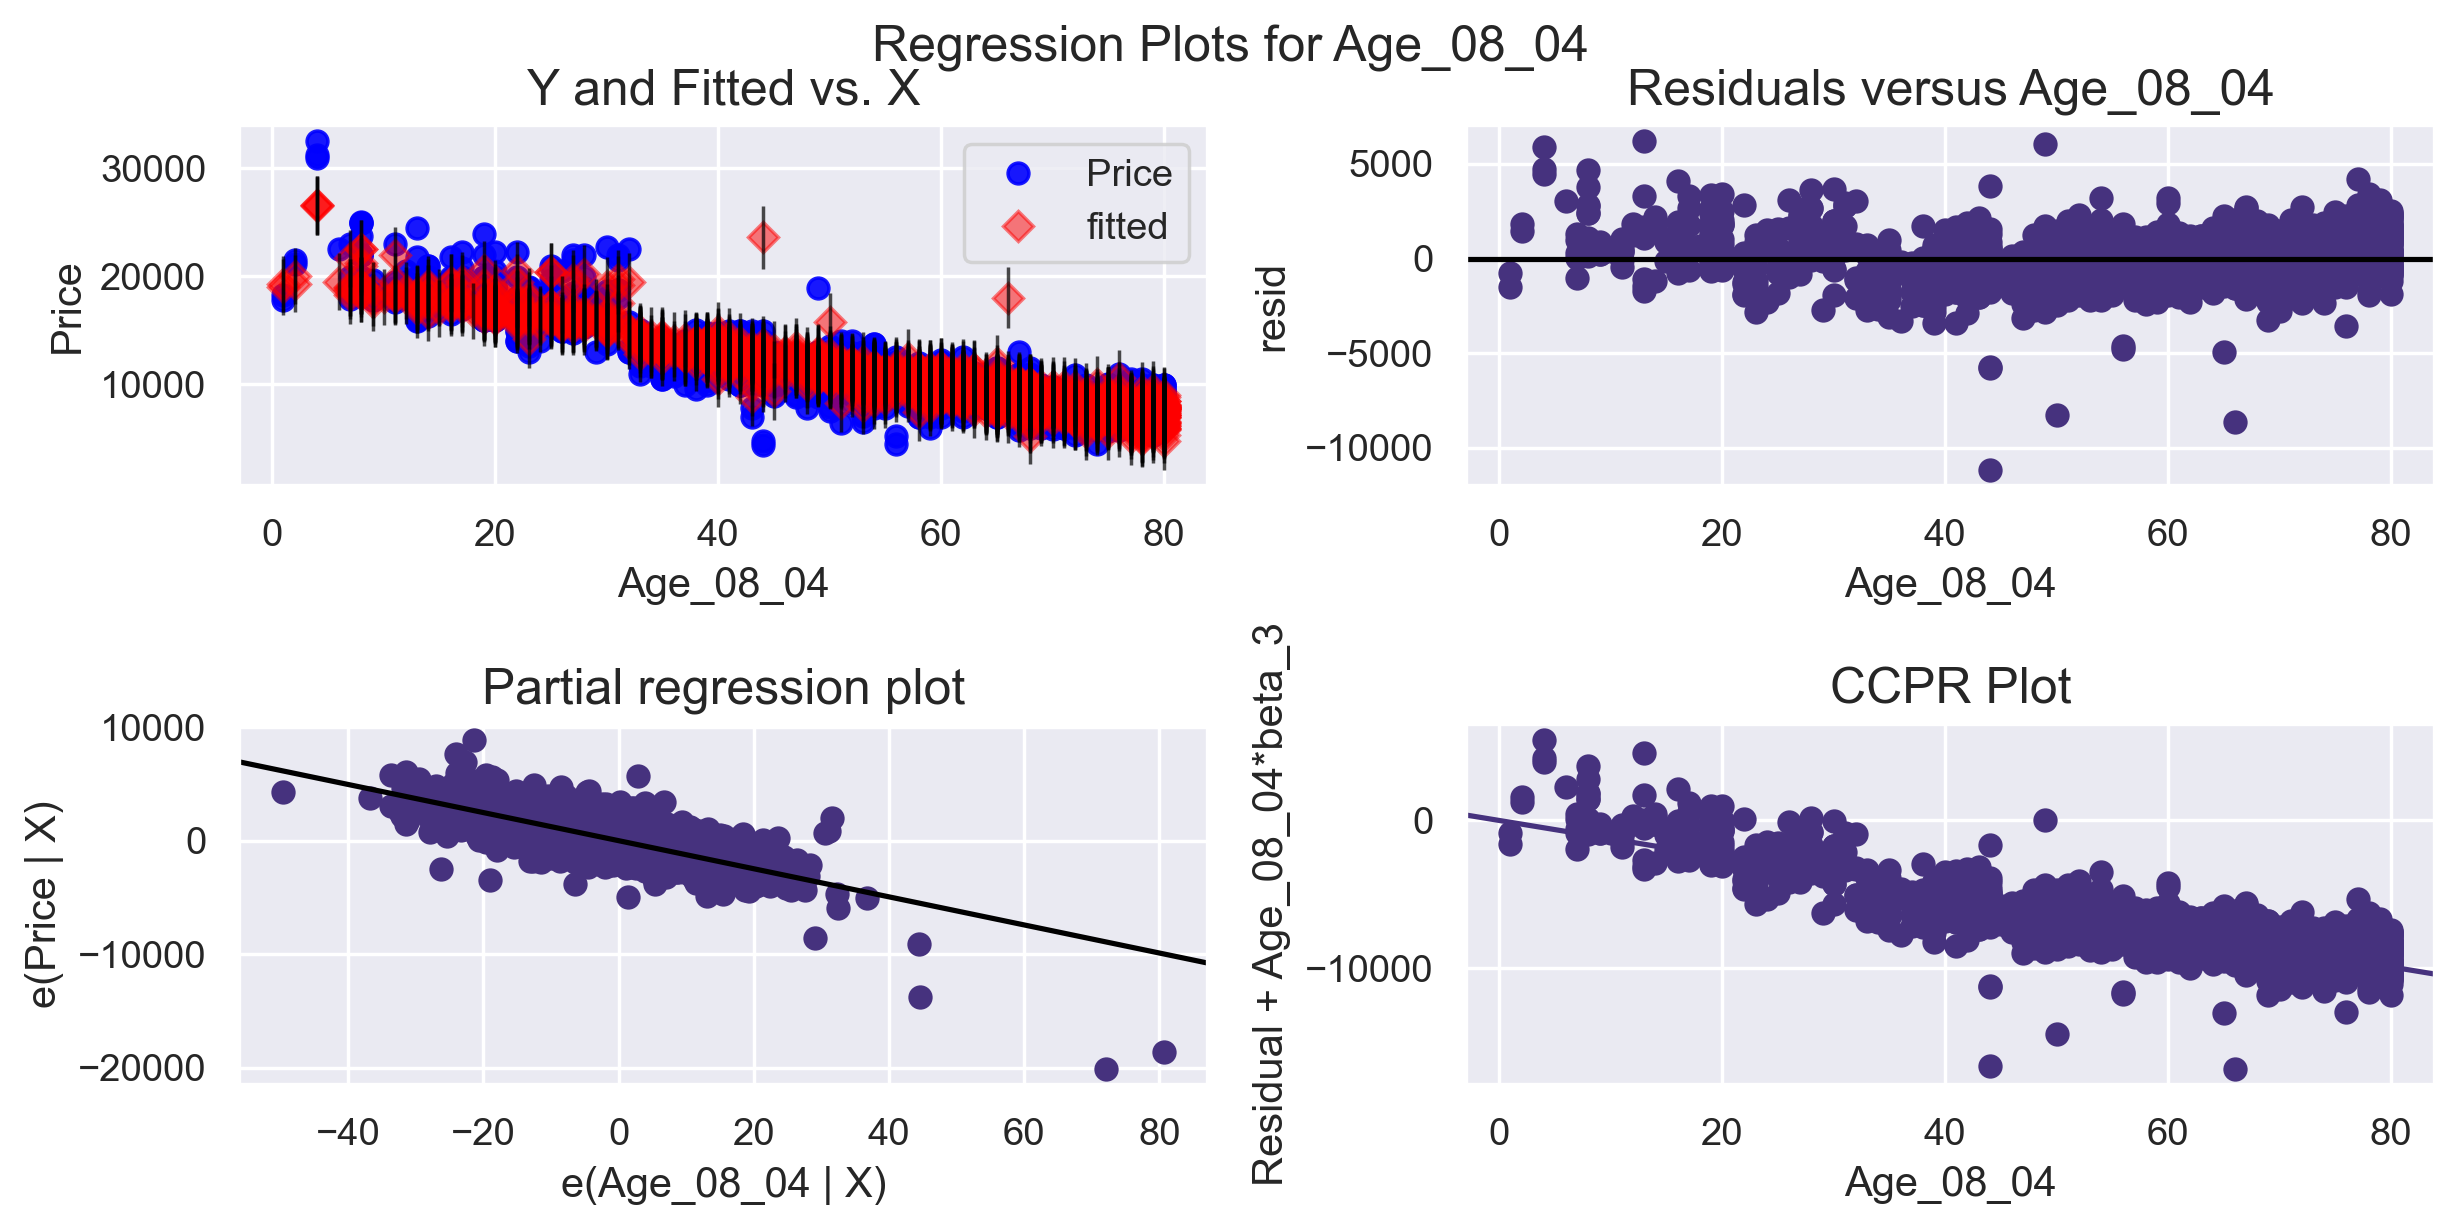

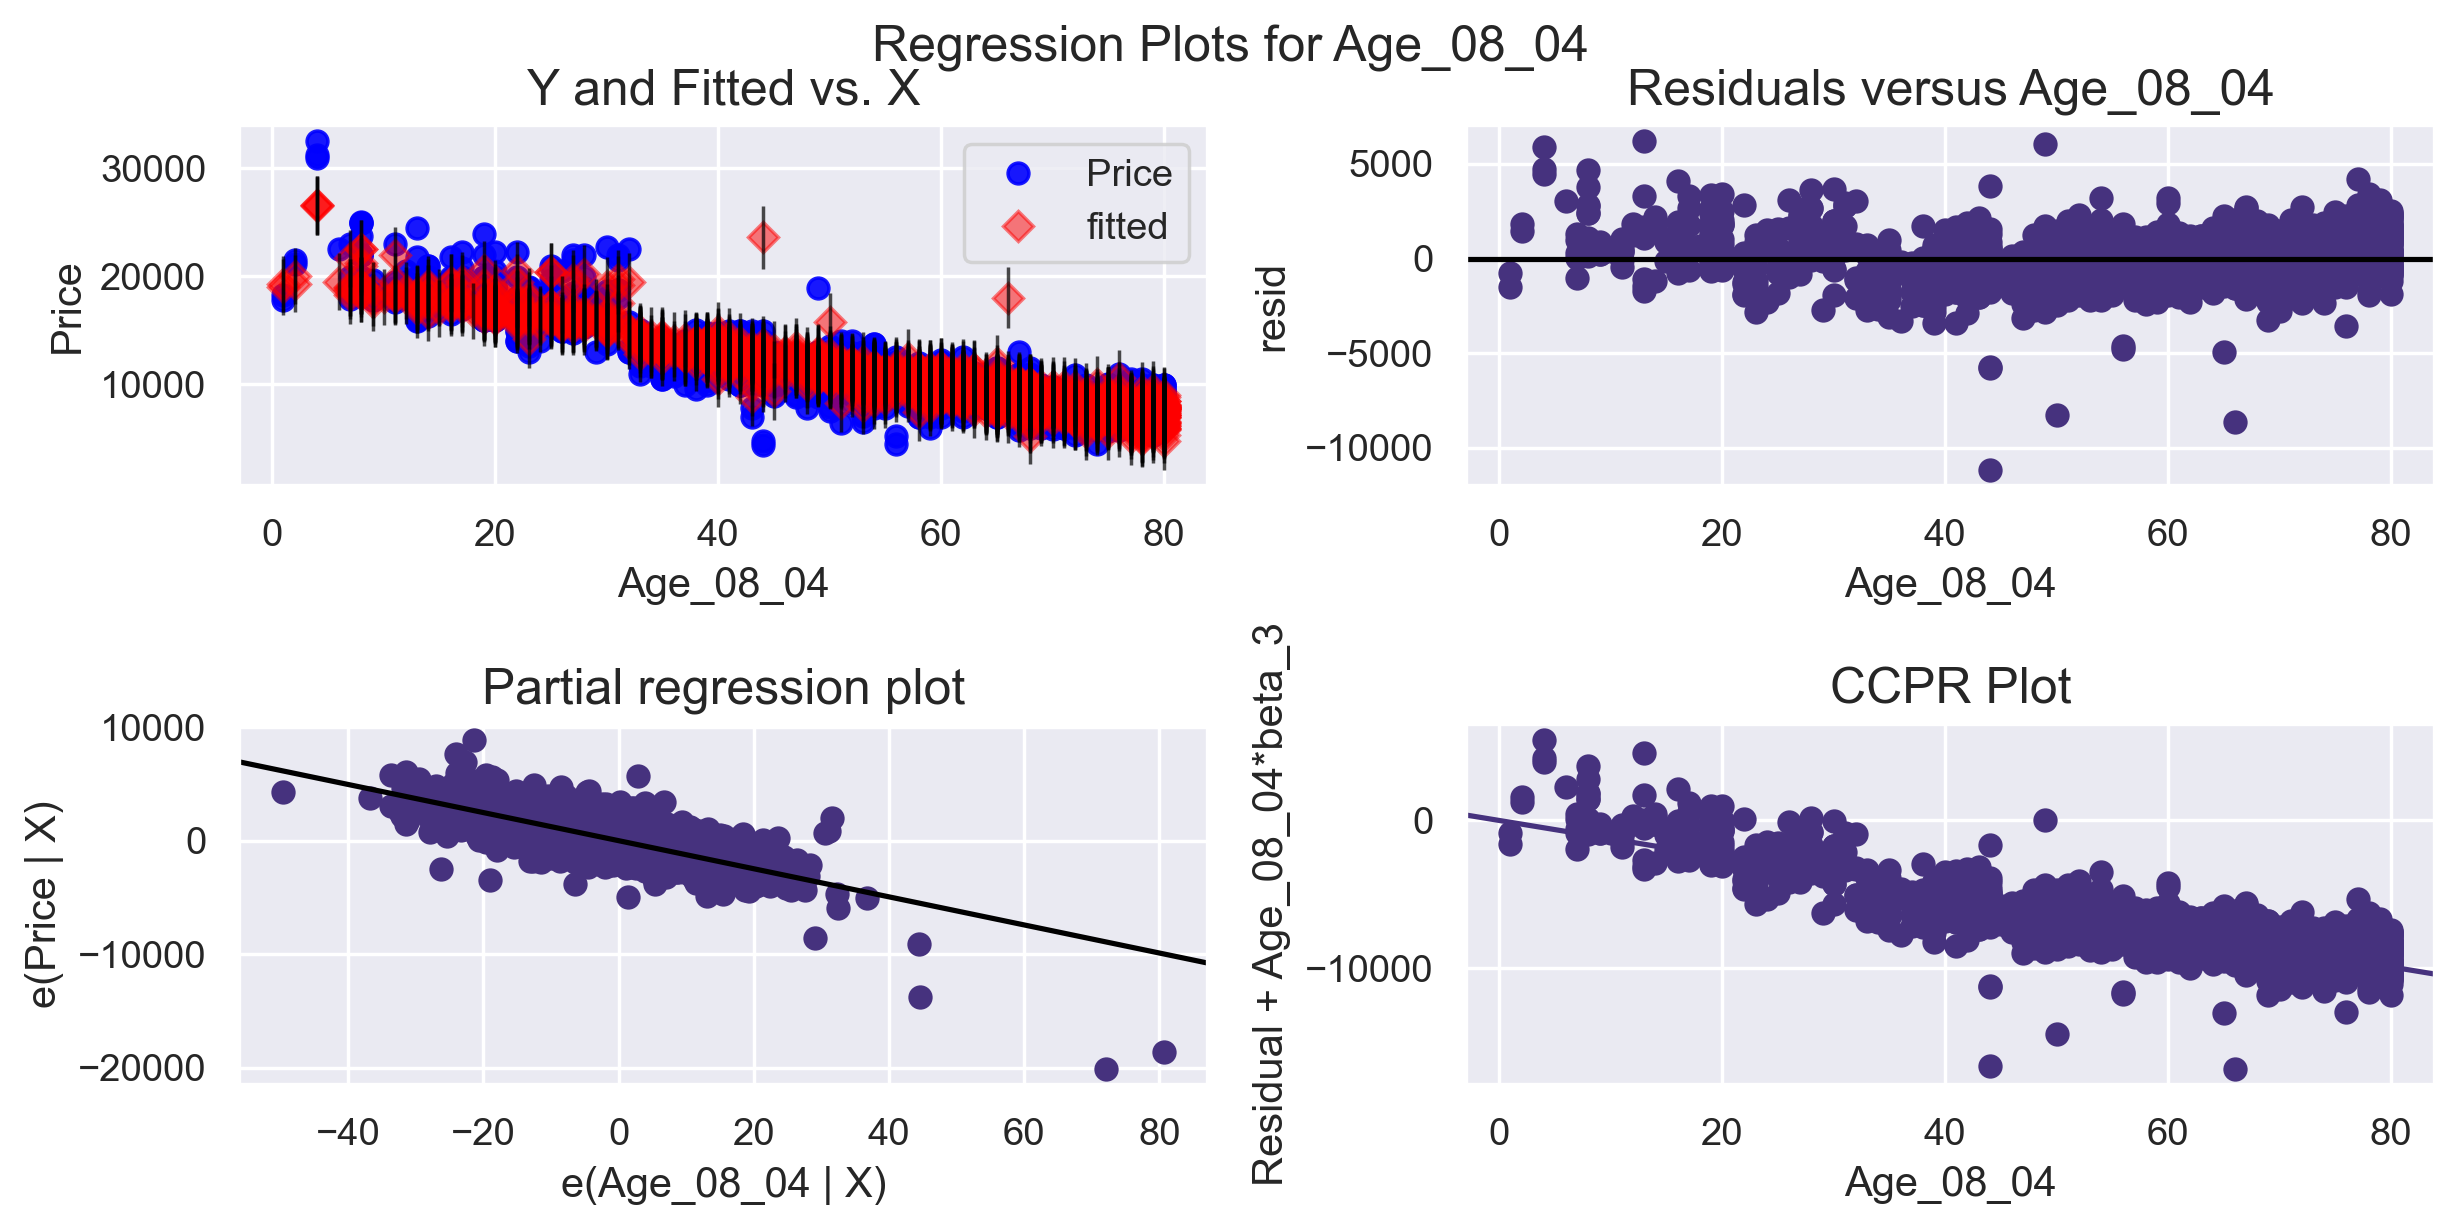

In [236]:
sm.graphics.plot_regress_exog(model,'Age_08_04')

# Cooks Distance

**.Deleting influencers and outliers**

In [237]:
model.rsquared

0.8649083778053923

In [238]:
#Find the influence data 
inf = model.get_influence() # in here no of rows= niumber of model can create on here

# Calculate the cooks distance 

c,p = inf.cooks_distance  # p is p_value and c is cooks_distance  variable



In [239]:
c

array([4.23218359e-03, 2.15175576e-03, 2.98539322e-03, ...,
       1.26359065e-05, 4.28390061e-04, 7.06463144e-03])

Text(0, 0.5, 'Cooks Distance')

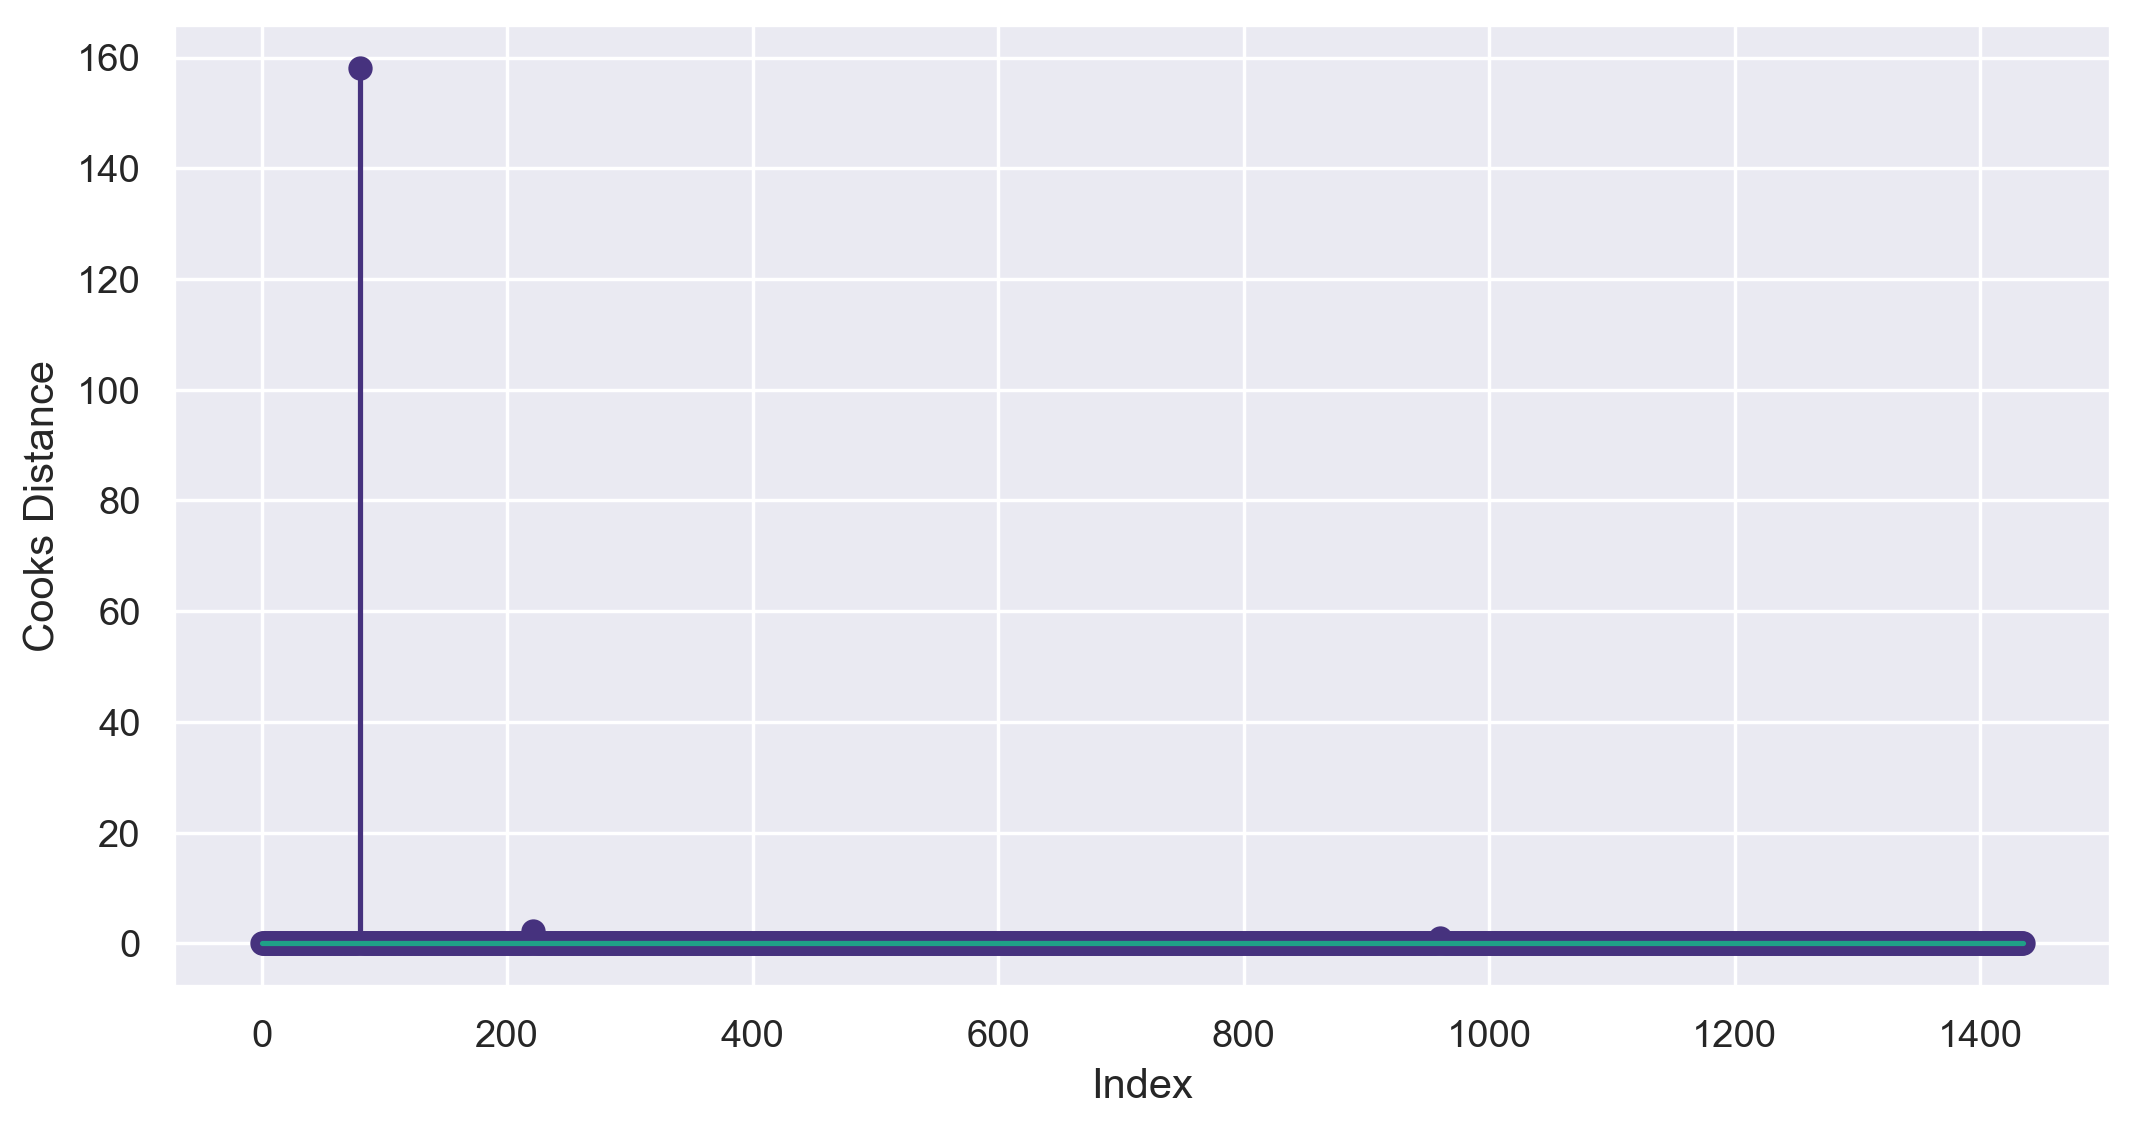

In [240]:
#Cooks distance plot 
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [241]:
np.argmax(c), np.max(c)  #we chek row number and cooks distance

(80, 158.0531870345073)

In [242]:
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [243]:
df.iloc[[80]]  # double Bracket is use for get  2 dimention table

Price  Age_08_04     KM Fuel_Type   HP  Automatic     cc  Doors  \
80  18950         25  20019    Petrol  110          1  16000      5   

    Cylinders  Gears  Weight  
80          4      5    1180

# Improvinfg the Model 

In [244]:
df.drop(index=80,inplace=True)

In [245]:
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1435 rows x 11 columns]

In [246]:
# Reset the index 

In [247]:
df.reset_index(inplace =True)

In [248]:
df

index  Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0         0  13500         23  46986    Diesel   90          0  2000      3   
1         1  13750         23  72937    Diesel   90          0  2000      3   
2         2  13950         24  41711    Diesel   90          0  2000      3   
3         3  14950         26  48000    Diesel   90          0  2000      3   
4         4  13750         30  38500    Diesel   90          0  2000      3   
...     ...    ...        ...    ...       ...  ...        ...   ...    ...   
1430   1431   7500         69  20544    Petrol   86          0  1300      3   
1431   1432  10845         72  19000    Petrol   86          0  1300      3   
1432   1433   8500         71  17016    Petrol   86          0  1300      3   
1433   1434   7250         70  16916    Petrol   86          0  1300      3   
1434   1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1430          4      5    1025  
1431          4      5    1015  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1114  

[1435 rows x 12 columns]

In [249]:
df.drop(columns='index',inplace=True)

In [250]:
final_model =smf.ols('Price~Age_08_04+KM+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight',data=df).fit()
final_model.rsquared

#0.8649083778053924 Privious Accuriecy 
# 0.8692249307237028

0.8694065734126988

**Since The value is <1,we can stop the dignostic processs and finalize the model**

#  Predicting for new record


In [251]:
df.head(2)

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165

In [252]:
test =pd.DataFrame({
    'Age_08_04':[30,23,22,21,18],
    'KM':[3000,40000,24000,3200,20],
    'Fuel_Type':['Diesel','CNG','Diesel','Petrol','CNG'],
    'HP':[90,70,70,96,88],
    'Automatic':[0,1,1,0,1],
    'cc':[1900,2300,2200,2000,1800],
    'Doors':[3,2,6,4,4],
    'Gears':[5,5,5,5,5],
    'Weight':[1150,1500,2200,2000,1200],
})
test


Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Gears  Weight
0         30   3000    Diesel  90          0  1900      3      5    1150
1         23  40000       CNG  70          1  2300      2      5    1500
2         22  24000    Diesel  70          1  2200      6      5    2200
3         21   3200    Petrol  96          0  2000      4      5    2000
4         18     20       CNG  88          1  1800      4      5    1200

In [253]:
final_model.params

Intercept             -5960.448482
Fuel_Type[T.Diesel]    3222.316367
Fuel_Type[T.Petrol]    1047.954622
Age_08_04              -122.072977
KM                       -0.016531
HP                       58.095111
Automatic               352.932986
cc                       -4.029682
Doors                    11.510400
Gears                   477.408782
Weight                   19.892749
dtype: float64

In [254]:
pred =final_model.predict(test)


In [255]:
#FInal Prediction of data 

Prediction =pd.DataFrame()
Prediction

Empty DataFrame
Columns: []
Index: []

In [256]:
prediction= test

In [257]:
prediction['Predicted_Price']=pred


In [258]:
prediction

Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Gears  Weight  \
0         30   3000    Diesel  90          0  1900      3      5    1150   
1         23  40000       CNG  70          1  2300      2      5    1500   
2         22  24000    Diesel  70          1  2200      6      5    2200   
3         21   3200    Petrol  96          0  2000      4      5    2000   
4         18     20       CNG  88          1  1800      4      5    1200   

   Predicted_Price  
0     16420.483904  
1     17971.122817  
2     35953.949943  
3     32207.421945  
4     16358.165933